In [59]:
import MetaTrader5 as mt5
import pandas as pd

# Initialize MT5 connection
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()


# Define the forex pair and timeframe
symbol = "Volatility 25 Index"
timeframe = mt5.TIMEFRAME_M5  # 1-hour bars

# Define the start and end times for the data
start_time = pd.to_datetime('2024-01-01 00:00:00')  # Replace with a valid start date
end_time = pd.to_datetime('2024-03-29 23:59:59')  # Replace with a valid end date


def get_historical_data(symbol, timeframe, start_time, end_time):
    """Retrieves historical data from the MT5 terminal and saves it to a CSV file.

    Args:
        symbol (str): The forex pair to retrieve data for.
        timeframe (int): The timeframe to retrieve data in. Must be one of the
            TIMEFRAME_* constants from the MetaTrader5 module.
        start_time (datetime): The starting date and time for the data retrieval.
        end_time (datetime): The ending date and time for the data retrieval.
    """
    # Retrieve historical data
    rates = mt5.copy_rates_range(symbol, timeframe, start_time, end_time)

    # Check if data was retrieved successfully
    if rates is None:
        print("No data retrieved, error code =", mt5.last_error())
        mt5.shutdown()  # Shutdown the connection
        quit()

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert timestamp to datetime

    # Save the data to a CSV file
    df.to_csv('forex_data.csv', index=False)


get_historical_data(symbol, timeframe, start_time, end_time)

# Close the connection to MetaTrader5
mt5.shutdown()


True

In [60]:
"""
Plot the {symbol} 1 hour candlestick chart using mplfinance.

This script loads the data from a CSV file, converts the 'time'
column to a datetime and sets it as the index. It then converts
the DataFrame to the format expected by mplfinance and plots the
candlestick chart using the 'charles' style.
"""

import pandas as pd
import mplfinance as mpf

# Load the data from the CSV file
df = pd.read_csv('forex_data.csv')

# Convert the 'time' column to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Convert the DataFrame to the format expected by mplfinance
ohlcv_data = df[['open', 'high', 'low', 'close', 'tick_volume']]

# Rename the columns to the format expected by mplfinance
ohlcv_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot the candlestick chart
# mpf.plot(ohlcv_data, type='candle',
#          style='charles',
#          title=f'{symbol} 1 Hour',
#          volume=True)



In [61]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: (pivot high, pivot low) where each is a boolean indicating if it's a pivot
    """
    if candle-window < 0 or candle+window >= len(df):
        return (False, False)
    
    pivotHigh = True
    pivotLow = True
    for i in range(candle-window, candle+window+1):
        if i != candle:
            if df.iloc[candle].low > df.iloc[i].low:
                pivotLow = False
            if df.iloc[candle].high < df.iloc[i].high:
                pivotHigh = False
    return (pivotHigh, pivotLow)

# Assuming 'df' is your DataFrame and it has columns 'high' and 'low'
window = 7  # Define the window size

# Iterate over the DataFrame and check for pivot points
# for i in range(len(df)):
#     pivotHigh, pivotLow = isPivot(i, window)
#     if pivotHigh:
#         print(f"Candle at index {i} is a pivot high")
#     if pivotLow:
#         print(f"Candle at index {i} is a pivot low")

In [62]:
import pandas as pd
import mplfinance as mpf

# Load the data from the CSV file
df = pd.read_csv('forex_data.csv')

# Convert the 'time' column to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Convert the DataFrame to the format expected by mplfinance
ohlcv_data = df[['open', 'high', 'low', 'close', 'tick_volume']]
ohlcv_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Define the window size for pivot point detection


# Create a DataFrame to store pivot points
pivot_points = pd.DataFrame(index=df.index, columns=['PivotHigh', 'PivotLow'])

# Identify pivot points
for i in range(window, len(df) - window):
    pivotHigh, pivotLow = isPivot(i, window)
    if pivotHigh:
        pivot_points.loc[df.index[i], 'PivotHigh'] = df.loc[df.index[i], 'high']
    if pivotLow:
        pivot_points.loc[df.index[i], 'PivotLow'] = df.loc[df.index[i], 'low']

# Calculate moving averages
# moving_averages = {'SMA_20': df['close'].rolling(window=20).mean(),
#                    'SMA_50': df['close'].rolling(window=1).mean()}

# Create a list to store pivot points
pivot_points_list = []

# Identify pivot points
for i in range(window, len(df) - window):
    pivotHigh, pivotLow = isPivot(i, window)
    if pivotHigh:
        pivot_points.loc[df.index[i], 'PivotHigh'] = df.loc[df.index[i], 'high']
        pivot_points_list.append(df.index[i])  # Append the datetime of the pivot high
    if pivotLow:
        pivot_points.loc[df.index[i], 'PivotLow'] = df.loc[df.index[i], 'low']
        pivot_points_list.append(df.index[i])  # Append the datetime of the pivot low

# Slice the DataFrame by a specific number of candles
# start_candle = 100
# end_candle = 500
# dfpl = df.iloc[start_candle:end_candle]
# print(len(df))

# # Slice the pivot points DataFrame to match the sliced data
# pivot_points_slice = pivot_points.iloc[start_candle:end_candle]

# # Create scatter plots for pivot highs and lows
# pivot_high_plot = mpf.make_addplot(pivot_points_slice['PivotHigh'], type='scatter', markersize=30, marker='x', color='b')
# pivot_low_plot = mpf.make_addplot(pivot_points_slice['PivotLow'], type='scatter', markersize=30, marker='x', color='r')

# Plot the candlestick chart with pivot points and moving averages
# mpf.plot(dfpl, type='candle', style='charles', title=f'{symbol} Forex Data', 
#          addplot=[pivot_high_plot, pivot_low_plot])

# addplot=[pivot_high_plot, pivot_low_plot], vlines=dict(vlines=['2024-03-23 11:00:00'],linewidths=(1)))
   

In [63]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('forex_data.csv')

# Convert the 'time' column to datetime if it's not already
df['time'] = pd.to_datetime(df['time'])

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Ensure that the 'high', 'low', 'open', and 'close' columns are present
assert all(col in df.columns for col in ['high', 'low', 'open', 'close'])

# Define the function to detect pivot points
def isPivot(candle, window):
    """
    Function that detects if a candle is a pivot/fractal point.
    Args:
        candle (int): Index of the candle to test.
        window (int): Number of candles before and after to test if pivot.
    Returns:
        (int, str): Pivot type (1 for high, 2 for low, 3 for both) and the index of the pivot.
    """
    if candle - window < 0 or candle + window >= len(df):
        return 0, None
    
    pivotHigh = all(df.iloc[candle].high > df.iloc[i].high for i in range(candle - window, candle + window + 1) if i != candle)
    pivotLow = all(df.iloc[candle].low < df.iloc[i].low for i in range(candle - window, candle + window + 1) if i != candle)
    
    if pivotHigh and pivotLow:
        return 3, df.index[candle]
    elif pivotHigh:
        return 1, df.index[candle]
    elif pivotLow:
        return 2, df.index[candle]
    else:
        return 0, None

# Define the window size for pivot point detection


# Create a DataFrame to store pivot points
sequence_data = []

# Identify pivot points and add them to the DataFrame
for i in range(window, len(df) - window):
    pivot_type, pivot_index = isPivot(i, window)
    if pivot_type in (1, 2, 3):
        sequence_data.append({
            'Time': pivot_index,
            'Pivot': df.loc[pivot_index, 'high'] if pivot_type == 1 else df.loc[pivot_index, 'low'],
            'PivotType': 'high' if pivot_type == 1 else 'low' if pivot_type == 2 else 'both',
            'CandleIndex': i
        })

# Create a DataFrame from the list of pivot points
sequence_df = pd.DataFrame(sequence_data)

# Set the 'CandleIndex' column as the index
sequence_df.set_index('CandleIndex', inplace=True)

# Print the DataFrame with pivot points
# print(sequence_df)

CHoCH

In [77]:
# print(sequence_df)
plot_data = []
index_low = []
index_high = []
occurences = []
entries = []
stop_losses = []
take_profits = []
fibonacci_levels = [0, 0.272, 0.382, 0.5, 0.618, 0.786, 1, 1.361,1.836]
high_low_sequence = False
pattern_found = False
fvg = False
for x in range(sequence_df.shape[0]):
    # print(sequence_df.iloc[x,0])
    # print(sequence_df.iloc[x,1])
    
    if ((sequence_df.iloc[x-0,2] == 'low' and sequence_df.iloc[x-1,2] == 'high' and sequence_df.iloc[x-2,2] == 'low' and sequence_df.iloc[x-3,2] == 'high' and sequence_df.iloc[x-4,2] == 'low' and sequence_df.iloc[x-5,2] == 'high')):
        high_low_sequence = True
    else:
        high_low_sequence = False
        
    if ((sequence_df.iloc[x-0,1] < sequence_df.iloc[x-4,1]) and (sequence_df.iloc[x-1,1] > sequence_df.iloc[x-3,1]) and (sequence_df.iloc[x-3,1] > sequence_df.iloc[x-5,1]) and (sequence_df.iloc[x-5,1] > sequence_df.iloc[x-4,1]) and (sequence_df.iloc[x-4,1] < sequence_df.iloc[x-2,1])):
        pattern_found = True
    else: 
        pattern_found = False
    if ((sequence_df.iloc[x-4,1] -sequence_df.iloc[x-0,1]) > 40/100 * (sequence_df.iloc[x-1,1] - sequence_df.iloc[x-2,1])):
        fvg =  True
    else:
        fvg = False
        
    if high_low_sequence == True and pattern_found == True and fvg == True:
        index_low.append(sequence_df.iloc[x-1,0])
        index_high.append(sequence_df.iloc[x-0,0])
        block_range = sequence_df.iloc[x-1,1] - sequence_df.iloc[x-2,1]

        entry_price = sequence_df.iloc[x-2,1]
        # (float((sequence_df.iloc[x-1,1] - sequence_df.iloc[x-2,1])/4) + sequence_df.iloc[x-2,1])
        entries.append(entry_price)

        # Calculate the stop loss and take profit levels
        stop_loss = sequence_df.iloc[x-1,1] + (block_range * fibonacci_levels[1])  # 50% retracement from entry
        stop_losses.append(stop_loss)
        take_profit = sequence_df.iloc[x-6,1] - (block_range * fibonacci_levels[8])  # 61.8% retracement from entry
        take_profits.append(take_profit)

# Create a DataFrame with the results
plot_df = pd.DataFrame({
    'Low_index': index_low,
    'Occurence': index_high,
    'Entry': entries,
    'Stop_Loss': stop_losses,
    'Take_Profit': take_profits
})
plot_df['Risk_to_Reward_Ratio'] = (plot_df['Take_Profit'] - plot_df['Stop_Loss']) / (plot_df['Entry'] - plot_df['Stop_Loss'])

print(plot_df)

            Low_index           Occurence     Entry    Stop_Loss  Take_Profit  \
0 2024-01-06 20:35:00 2024-01-06 23:40:00  2038.058  2052.221720  2003.938140   
1 2024-02-10 12:50:00 2024-02-10 15:35:00  2012.785  2020.796056  1992.390872   
2 2024-02-17 11:35:00 2024-02-17 13:50:00  2060.421  2078.296416  2027.930692   
3 2024-03-21 23:55:00 2024-03-22 00:35:00  2271.807  2284.398528  2244.226436   

   Risk_to_Reward_Ratio  
0              3.408962  
1              3.545748  
2              2.817597  
3              3.190406  


H and S

In [65]:
# # print(sequence_df)
# plot_data = []
# index_low = []
# index_high = []
# occurences = []
# entries = []
# stop_losses = []
# take_profits = []
# fibonacci_levels = [0, 0.272, 0.382, 0.5, 0.618, 0.786, 1, 1.361,1.836, 2, 3]
# for x in range(sequence_df.shape[0]):
#     # print(sequence_df.iloc[x,0])
#     # print(sequence_df.iloc[x,1])

#     if ((sequence_df.iloc[x-0,2] == 'low' and sequence_df.iloc[x-1,2] == 'high' and sequence_df.iloc[x-2,2] == 'low' and sequence_df.iloc[x-3,2] == 'high' and sequence_df.iloc[x-4,2] == 'low' and sequence_df.iloc[x-5,2] == 'high')) and ((sequence_df.iloc[x-1,1] > sequence_df.iloc[x-2,1]) and (sequence_df.iloc[x-3,1] > sequence_df.iloc[x-1,1]) and (sequence_df.iloc[x-5,1] >sequence_df.iloc[x-4,1]) and (sequence_df.iloc[x-3,1] > sequence_df.iloc[x-5,1]) and (sequence_df.iloc[x-6,1] < sequence_df.iloc[x-4,1]) and (sequence_df.iloc[x-0,1] < sequence_df.iloc[x-2,1]) and (sequence_df.iloc[x-0,1] < sequence_df.iloc[x-6,1]) and (sequence_df.iloc[x-5,1] > sequence_df.iloc[x-2,1])) and ((sequence_df.iloc[x-1,1] - sequence_df.iloc[x-0,1]) > 100/40 * (sequence_df.iloc[x-1,1] - sequence_df.iloc[x-2,1])):
#         index_low.append(sequence_df.iloc[x-1,0])
#         index_high.append(sequence_df.iloc[x-0,0])
#         block_range = sequence_df.iloc[x-3,1] - sequence_df.iloc[x-2,1]

#         entry_price = sequence_df.iloc[x-3,1] - block_range * 0.168
#         # (float((sequence_df.iloc[x-1,1] - sequence_df.iloc[x-2,1])/4) + sequence_df.iloc[x-2,1])
#         entries.append(entry_price)

#         # Calculate the stop loss and take profit levels
#         stop_loss = sequence_df.iloc[x-3,1] + (block_range * fibonacci_levels[5])  # 50% retracement from entry
#         stop_losses.append(stop_loss)
#         take_profit = sequence_df.iloc[x-2,1] - (block_range * fibonacci_levels[10])  # 61.8% retracement from entry
#         take_profits.append(take_profit)


# # Create a DataFrame with the results
# plot_df = pd.DataFrame({
#     # 'Low_index': index_low,
#     'Occurence': index_high,
#     'Entry': entries,
#     'Stop_Loss': stop_losses,
#     'Take_Profit': take_profits
# })
# plot_df['Risk_to_Reward_Ratio'] = (plot_df['Take_Profit'] - plot_df['Stop_Loss']) / (plot_df['Entry'] - plot_df['Stop_Loss'])

# print(plot_df)

500


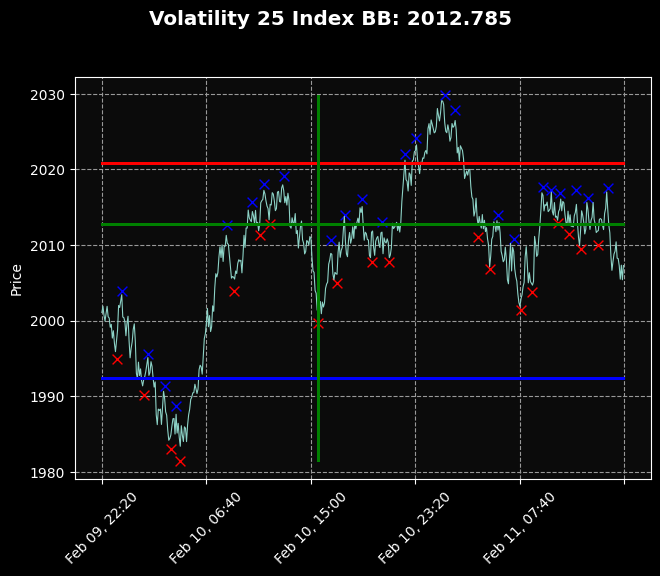

In [78]:
# Assuming df is your DataFrame with the price data
# Assuming pivot_points is a DataFrame with pivot highs and lows
# Assuming entries, stop_losses, and take_profits are lists with the corresponding values
# This code block is responsible for slicing the data and pivot point data so that we can
# plot a specific number of candles. The slicing is necessary to ensure that the length of
# the data to be plotted is the same as the length of the pivot points data.
start_candle = 11500
end_candle = 12000
dfpl = df.iloc[start_candle:end_candle]  # slice the data to the desired length

pivot_points_slice = pivot_points.iloc[start_candle:end_candle]  # slice the pivot points data to match the sliced data

# Create scatter plots for the pivot highs and lows
pivot_high_plot = mpf.make_addplot(pivot_points_slice['PivotHigh'], type='scatter', markersize=50, marker='x', color='b')
pivot_low_plot = mpf.make_addplot(pivot_points_slice['PivotLow'], type='scatter', markersize=50, marker='x', color='r')

# Define the line index for the entry point you want to plot
line_index = 1

# print the length of the sliced data to ensure it has the same length as the pivot points data
print(len(dfpl))

# Plot the candlestick chart with the pivot points and moving averages
mpf.plot(dfpl, type='line', style='nightclouds',
         # add a title to the plot with the symbol and current entry point
         title=f'{symbol} BB: {entries[line_index]}',
         addplot=[pivot_high_plot, pivot_low_plot],
         # add horizontal lines at the entry point, stop loss and take profit levels
         hlines=dict(hlines=[entries[line_index], stop_losses[line_index], take_profits[line_index]],
                     linewidths=(0.8), colors=['green', 'red', 'blue'], linestyle='-'),
         # add a vertical line at the index high for the entry point
         vlines=dict(vlines=index_high[line_index], linewidths=(0.8), colors=['green'], alpha=1))


In [ ]:
index_high[1:len(index_high)]

[Timestamp('2024-01-05 10:30:00'),
 Timestamp('2024-01-06 14:00:00'),
 Timestamp('2024-01-18 01:20:00'),
 Timestamp('2024-01-23 19:30:00'),
 Timestamp('2024-02-05 05:10:00'),
 Timestamp('2024-02-06 06:30:00'),
 Timestamp('2024-02-08 17:40:00'),
 Timestamp('2024-02-10 17:00:00'),
 Timestamp('2024-02-17 03:00:00'),
 Timestamp('2024-03-01 22:10:00'),
 Timestamp('2024-03-06 16:30:00'),
 Timestamp('2024-03-15 16:40:00')]